### PROJECT TEAM ID : PTID-CDS-OCT-24-2098
### PROJECT ID : PRCP-1016-HeartDieseasePred
### PROJECT NAME : Heart Disease Prediction

# Business Problem

Heart disease is a leading cause of death worldwide, often going undetected until advanced stages. Traditional diagnostic methods can be slow and inefficient, leading to delayed interventions. This project addresses the need for an accurate predictive model that identifies high-risk patients early, enabling timely prevention and treatment, ultimately improving patient outcomes and reducing healthcare costs.


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             roc_curve, auc, recall_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Statistical functions
from scipy import stats


In [2]:
# Import dataset
data1=pd.read_csv("values.csv")
data2=pd.read_csv("labels.csv")

In [3]:
data1.sample()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
38,ascl42,1,normal,120,2,1,0,2,269,0.2,0,74,121,1


In [4]:
data2.sample()

,patient_id,heart_disease_present
147,mxabaz,1


In [5]:
data=pd.concat([data1,data2.drop('patient_id',axis=1)],axis=1)

In [6]:
data.sample()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
154,43k3gx,2,reversible_defect,130,3,1,0,0,263,1.2,0,62,97,0,1


# Domain Analysis: Heart Disease Prediction

## Target Column: Heart Disease Present

In this project, we analyze how various features of the dataset affect the presence of heart disease.

### 1. Patient ID
- **Description**: Unique identifier for each patient.
- **Impact**: This is a unique column used for identification and does not affect heart disease outcomes.

### 2. Slope of Peak Exercise ST Segment
- **Description**: Indicates the slope of the ST segment during peak exercise.
  - Values:
    - 1: Upsloping
    - 2: Flat
    - 3: Downsloping
- **Impact**: Both positive and negative heart disease patients exhibit equal distributions across these slope categories.

### 3. Thal
- **Description**: Refers to thalassemia, a blood disorder.
  - Values:
    - Normal
    - Reversible defect
    - Fixed defect
- **Impact**: The type of thalassemia can influence heart health.

### 4. Resting Blood Pressure
- **Description**: Measures blood pressure at rest.
- **Impact**: High blood pressure (hypertension) can lead to serious heart-related issues, including strokes.

### 5. Chest Pain Type
- **Description**: Classifies types of chest pain.
  - Values:
    - TA: Typical angina (1)
    - ATA: Atypical angina (2)
    - NAP: Non-anginal pain (3)
    - ASY: Asymptomatic (4)
- **Impact**: Different types of chest pain indicate varying levels of heart disease risk.

### 6. Number of Major Vessels
- **Description**: Counts major blood vessels of the heart.
- **Values**: Ranges from 0 to 3.
- **Impact**: Fewer major vessels may correlate with a higher risk of heart disease.

### 7. Fasting Blood Sugar
- **Description**: Indicates fasting blood sugar levels.
  - Values:
    - 1: > 120 mg/dL (high)
    - 0: ≤ 120 mg/dL (normal)
- **Impact**: Elevated fasting blood sugar can signal potential health problems.

### 8. Resting EKG/ECG Result
- **Description**: Measures the heart’s electrical activity at rest.
  - Values:
    - 0: Normal
    - 1: ST-T wave abnormality
    - 2: Left ventricular hypertrophy
- **Impact**: Abnormal EKG results may indicate underlying heart issues.

### 9. Serum Cholesterol
- **Description**: Total cholesterol levels in the blood.
- **Impact**: High cholesterol is a significant risk factor for heart disease.

### 10. Oldpeak (ST Depression)
- **Description**: ST depression induced by exercise relative to rest.
- **Impact**: Higher values indicate potential heart issues.

### 11. Sex
- **Description**: Gender of the patient.
  - Values:
    - 1: Male
    - 0: Female
- **Impact**: Gender may influence heart disease risk.

### 12. Age
- **Description**: Age of the patient in years.
- **Impact**: Age is a critical factor in assessing heart disease risk.

### 13. Max Heart Rate
- **Description**: Highest heart rate achieved during exercise.
- **Impact**: An increase in heart rate by 10 bpm can significantly raise the risk of cardiac death.

### 14. Exercise-Induced Angina
- **Description**: Indicates presence of angina during exercise.
  - Values:
    - 0: No
    - 1: Yes
- **Impact**: Presence of angina is a strong indicator of heart disease.

### 15. Heart Disease Present
- **Description**: Indicates whether heart disease is present.
  - Values:
    - 0: No heart disease
    - 1: Heart disease present


# Basic Checks

In [7]:
# check first five rows
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
# check last five rows
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [9]:
# check shape of data
data.shape

(180, 15)

* In our dataset we have 15 features and 180 samples or data.
* Here heart_disease_present is the dependent variable and rest of them are independent variables.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

* There are 1 column float type, 12 columns integer type columns and 2 columns object or categorical type columns

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [12]:
data.describe(include=["O"])

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [13]:
# Check null values
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

* There is no null values in dataset

# Exploratory Data Analysis

In [14]:
print("*********************************************************")
for i in data:
    if len(data[i].unique())<=20:
        print(data[i].value_counts())
        print('*********************************************************')

*********************************************************
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
*********************************************************
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
*********************************************************
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
*********************************************************
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
*********************************************************
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
*********************************************************
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64
*********************************************************
sex
1    124
0     56
Name: count, dtype: int64
******************************************************

In [15]:
data_cat =[]
for i in data:
    if len(data[i].unique())<=20:
        data_cat.append(i)

# Ctegorical columns data
cat_cols=data[data_cat]

In [16]:
# Numerical columns data
num_cols=data.drop(cat_cols,axis='columns')

# Univariate Analysis

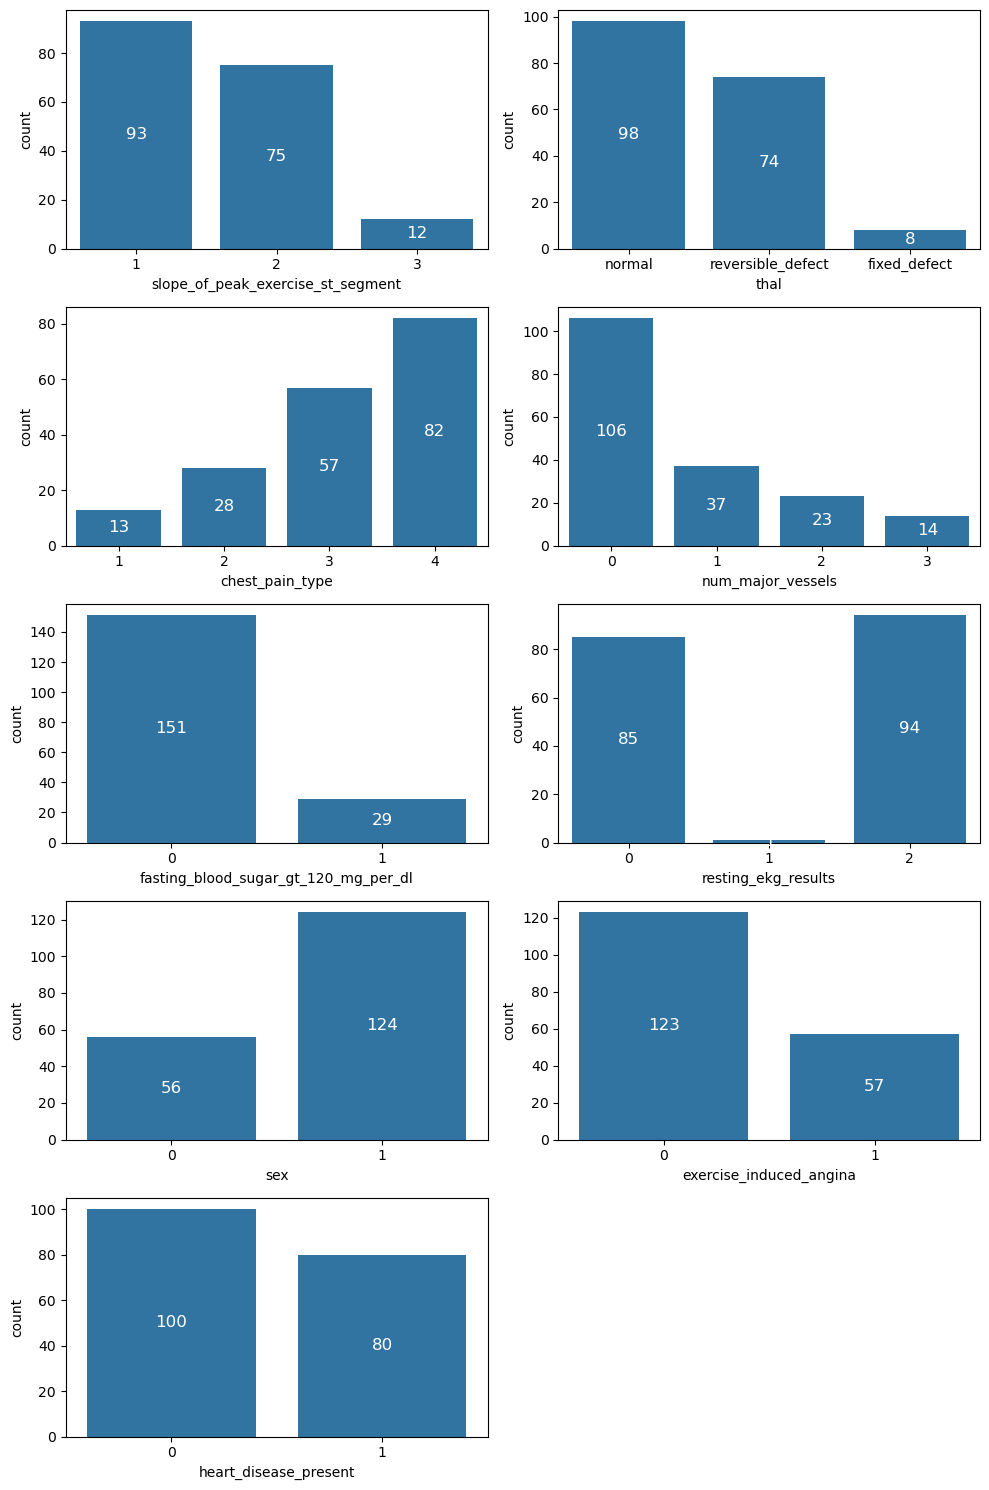

In [17]:
plt.figure(figsize=(10,15))
plotnumber =1
for i in cat_cols:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x=cat_cols[i])
    ax.bar_label(ax.containers[0], label_type='center', fontsize=12, color='w')
    plotnumber +=1
plt.tight_layout()
plt.show()

# Insights

- **Slope of Peak Exercise ST Segment**: Most patients exhibit a healthy slope (Type 1) or a neutral slope (Type 2), with only a small number showing potential issues (Type 3).

- **Thallium Results**: The data indicates that **98 patients** have normal thallium results, suggesting good heart function, while **74 patients** have a reversible defect, indicating potential ischemia. Only **8 patients** exhibit a fixed defect, which may signify more serious heart issues.

- **Chest Pain Types**: Most patients experience Type 4 chest pain (**82 patients**), followed by Type 3 (**57 patients**), indicating that severe pain is common. Types 2 (**28 patients**) and 1 (**13 patients**) are less common, showing that milder chest pain is rare.

- **Major Vessel Disease**: The majority of patients (**106 patients**) have no major vessel disease, while **37 patients** have one affected vessel. Fewer patients have two (**23 patients**) or three (**14 patients**) affected vessels, suggesting that severe vessel disease is less common in this population.

- **Fasting Blood Sugar Levels**: The data shows that **151 patients** have fasting blood sugar levels at or below **120 mg/dL**, while **29 patients** have levels greater than **120 mg/dL**, indicating that most patients have normal blood sugar levels.

- **Resting EKG Results**: Most patients have a normal resting EKG result (2, **94 patients**), followed by those with abnormal results (0, **85 patients**). Only **1 patient** has a specific condition (1), indicating that severe abnormalities are quite rare in this group.

- **Gender Distribution**: The majority of patients are male (1, **124 patients**), while a smaller number are female (0, **56 patients**), indicating a higher representation of males in this group.

- **Exercise-Induced Angina**: Most patients don’t have exercise-induced angina (0, **123 patients**), while fewer patients do (1, **57 patients**), meaning most can exercise without chest pain.

- **Heart Disease Imbalance**: The dataset shows an imbalance, with **100 patients** without heart disease and **80 patients** with it, indicating that more patients are heart disease-free.



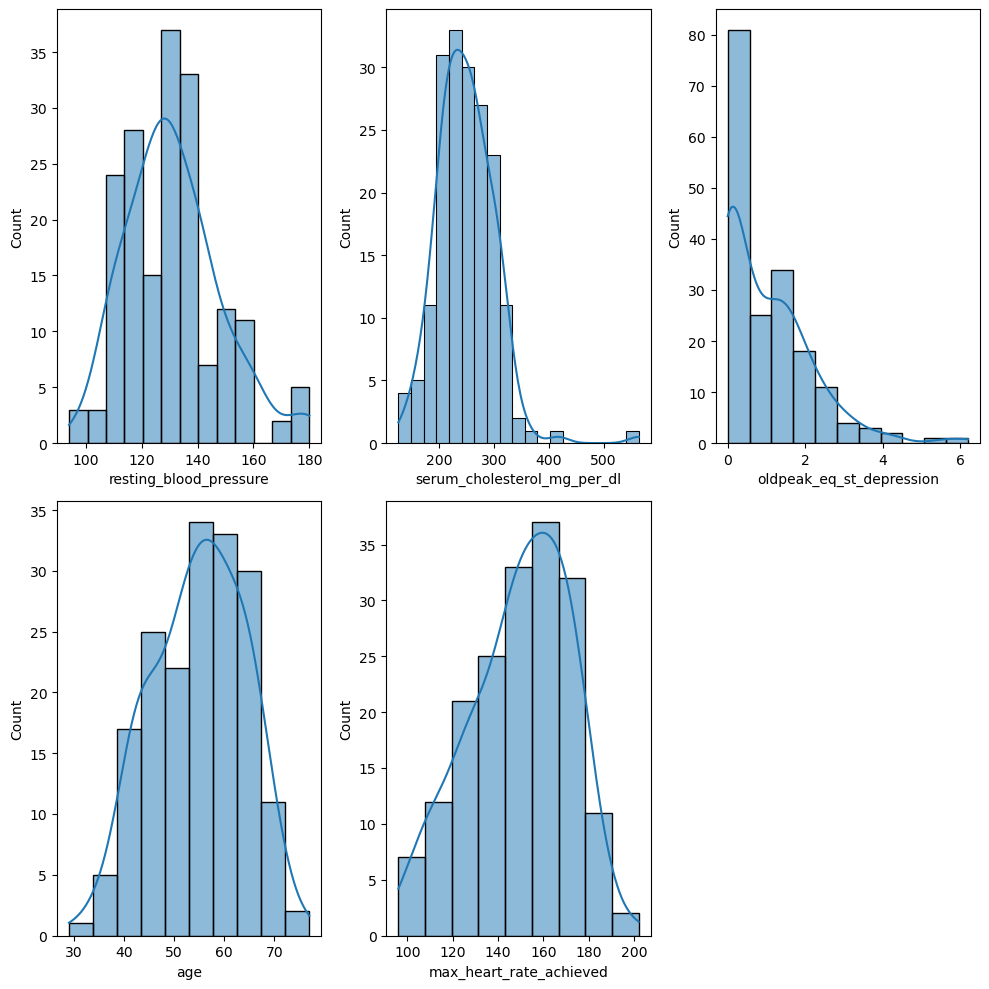

In [18]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in num_cols.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x=num_cols[i],kde=True)
    plotnumber +=1
plt.tight_layout()

# Insights

- **Resting Blood Pressure**: Most patients have resting blood pressure ranging between **115 to 160 mmHg**.

- **Serum Cholesterol Levels**: The serum cholesterol levels for most patients fall between **200 to 300 mg/dL**.

- **Old Peak ST Depression**: Most patients exhibit **zero** ST depression induced by exercise relative to rest.

- **Age Distribution**: The majority of patients are within the age group of **40 to 70**.

- **Maximum Heart Rate Achieved**: Most patients achieve a maximum heart rate ranging from **120 to 180 bpm**.


# Bivariate Analysis

In this section, we will compare each independent variable to the dependent variable to identify any characteristics or relationships between them.

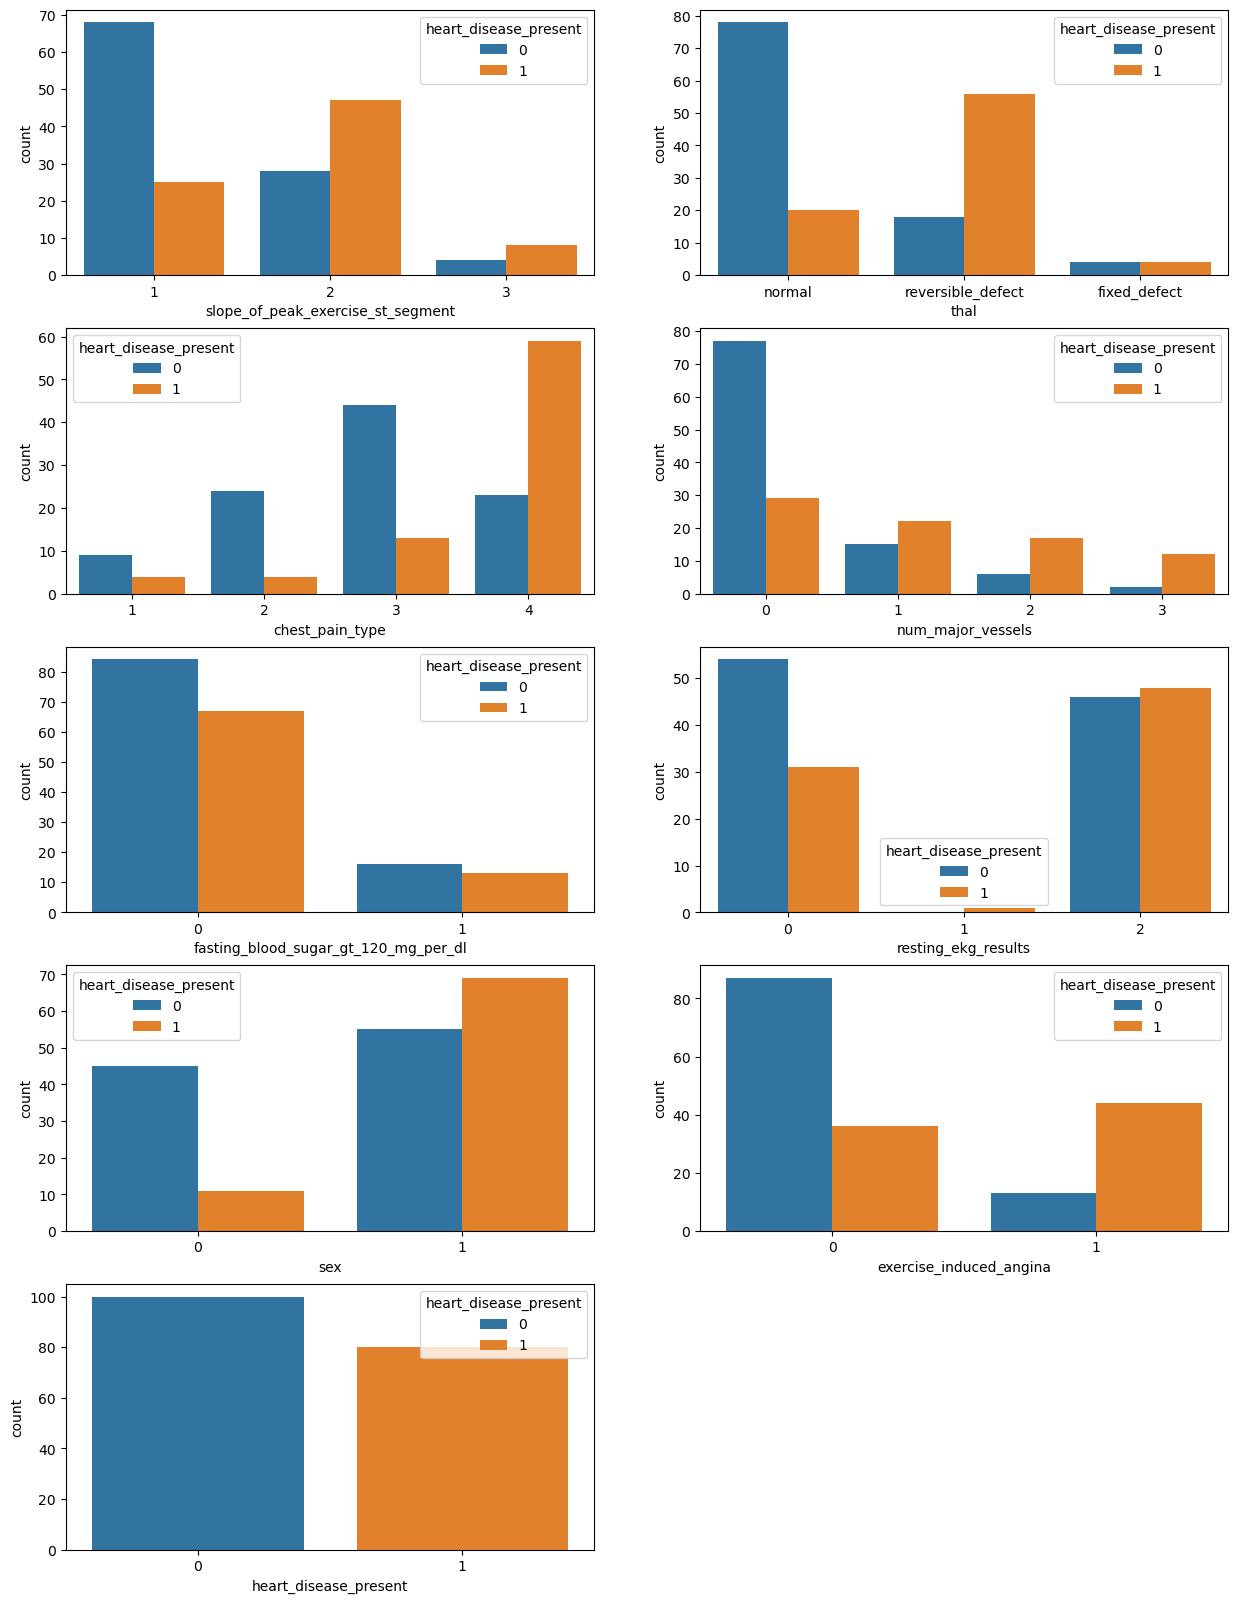

In [19]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in cat_cols:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = cat_cols[i],hue=data.heart_disease_present)
    plotnumber+=1

# Insights

- **Peak Exercise ST Segment**: The slope indicates heart health; Type 1 suggests lower chances of heart disease, while Types 2 and 3 indicate higher risk.

- **Thallium Stress Test**: A normal test indicates lower heart disease risk, while reversible and fixed defects suggest higher risk.

- **Chest Pain Type**: Type 4 chest pain is associated with a higher likelihood of heart disease.

- **Major Vessels in Fluoroscopy**: The number of affected vessels (0-3) correlates with heart disease risk, with 0 vessels indicating lower risk.

- **Fasting Blood Sugar Levels**: Most patients have levels under 120 mg/dL, but heart disease can still occur in those with normal blood sugar.

- **Resting EKG Results**: Abnormal results (Value-2) are more likely associated with heart disease compared to normal results (Value-0). The Value-1 category is insufficient for meaningful conclusions.

- **Gender and Heart Disease**: Males are more likely to have heart disease than females, indicating a greater cardiovascular risk for male patients.

- **Exercise-Induced Angina**: Most patients do not experience this, suggesting lower heart disease risk, while those who do have a higher likelihood.

- **Dataset Imbalance**: There are more individuals without heart disease than with it, indicating data imbalance.


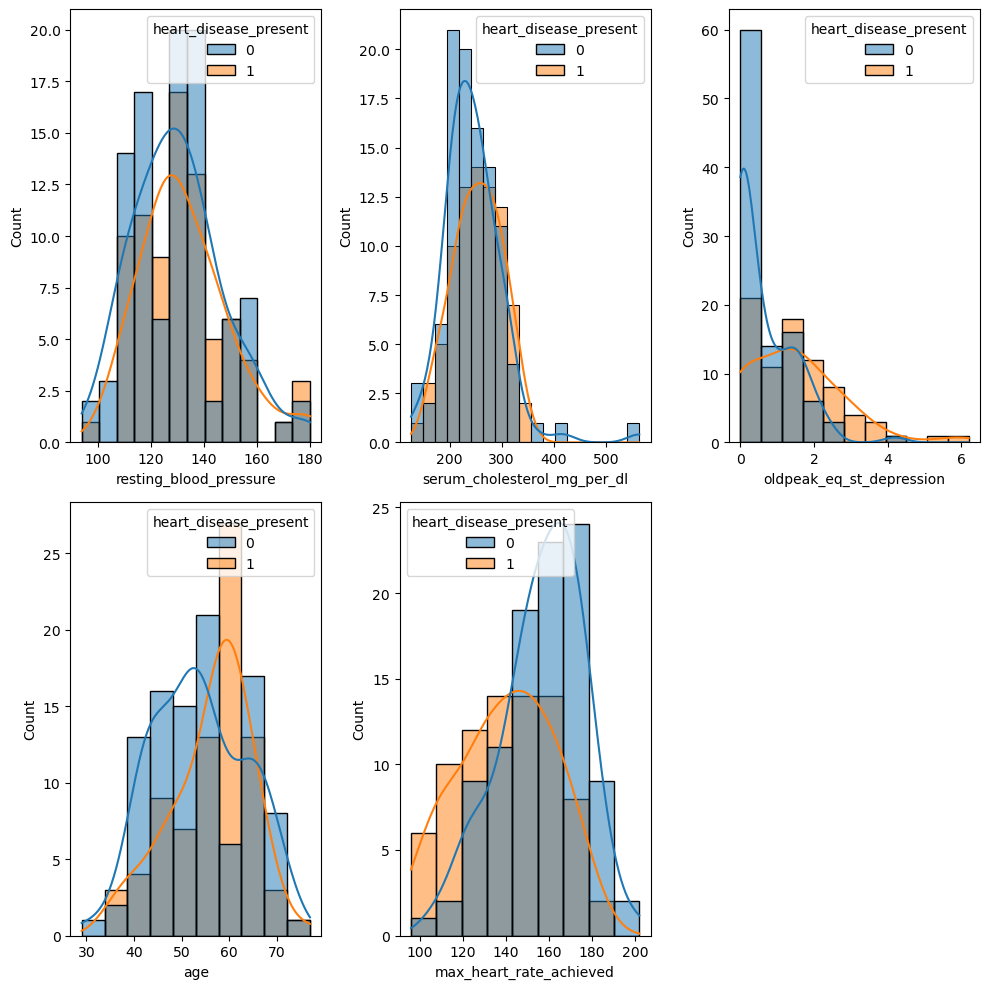

In [20]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in num_cols.drop("patient_id",axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x=num_cols[i],kde=True,hue=data['heart_disease_present'])
    plotnumber+=1
plt.tight_layout()
    

# Insights 

- **Resting Blood Pressure**: More than **50%** of patients have a resting blood pressure in the range of **120 to 160** mmHg, and most of these patients show signs of heart disease.

- **Serum Cholesterol Levels**: Over **70%** of patients with serum cholesterol levels indicate the presence of heart disease.

- **Old Peak ST Depression**: A significant number of patients have a **zero** old peak ST depression induced by exercise compared to rest, and these patients typically do not exhibit heart disease.

- **Maximum Heart Rate Achieved**: The majority of patients achieve a maximum heart rate between **100 to 160** beats per minute, with many of them presenting with heart disease.



# Multivarient Analysis

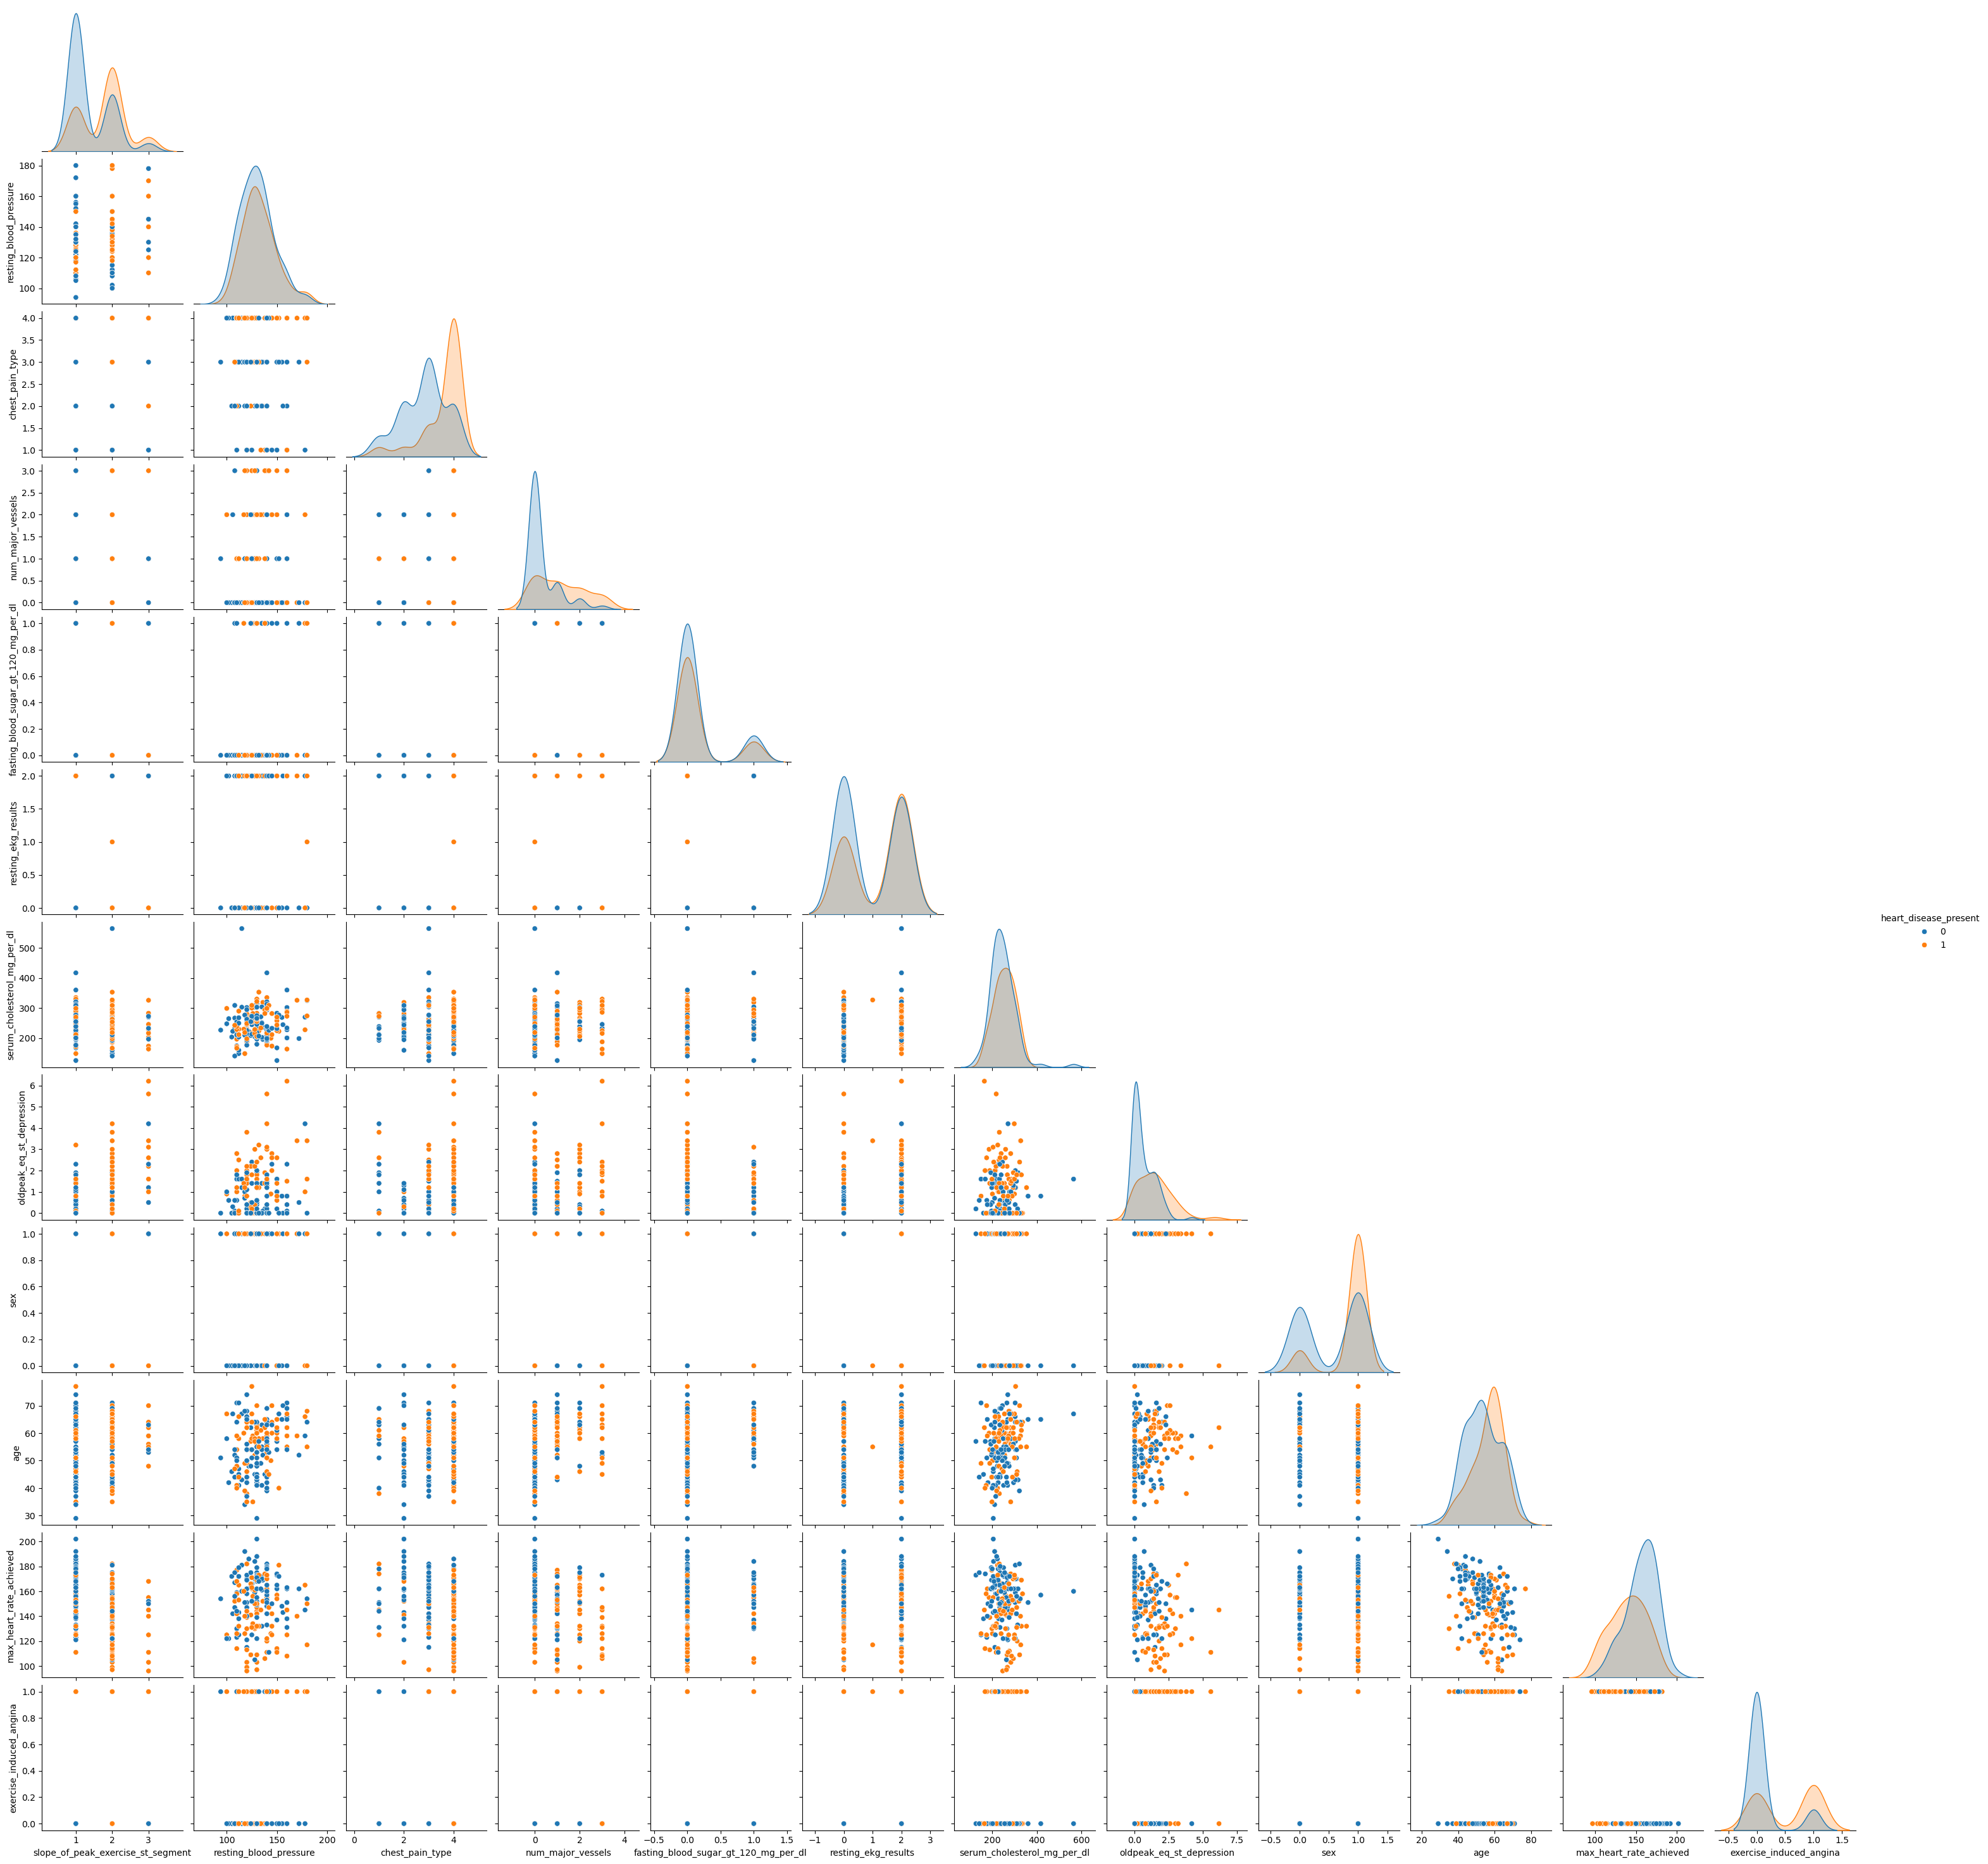

In [21]:
sns.pairplot(data,hue='heart_disease_present',corner=True )

# Data Preprocessing

In [22]:
# Check missing values
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

* There is no null value in dataset

## CATEGORICAL DATA CONVERSION
### MANUAL ENCODING
* 
Manual encoding is best technique to handle categorical data with the help of map function

In [23]:
# In this dataset only one categorical data-type feature 
# we use manual encoding to convert categorical data to numerical 
# Getting the value counts of thal
data.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [24]:
# normal is assign with value 2 because normal has more weightage
# reversible defect assign with value 1 because of less weightage than normal
# fixed defect assign with value 0 because of less weightage
dict = {'normal':2,'reversible_defect':1,'fixed_defect':0}
data['thal']=data['thal'].map(dict)

In [25]:
# checking the unique value of thal
data.thal.unique()

array([2, 1, 0], dtype=int64)

# OUTLIER HANDLING

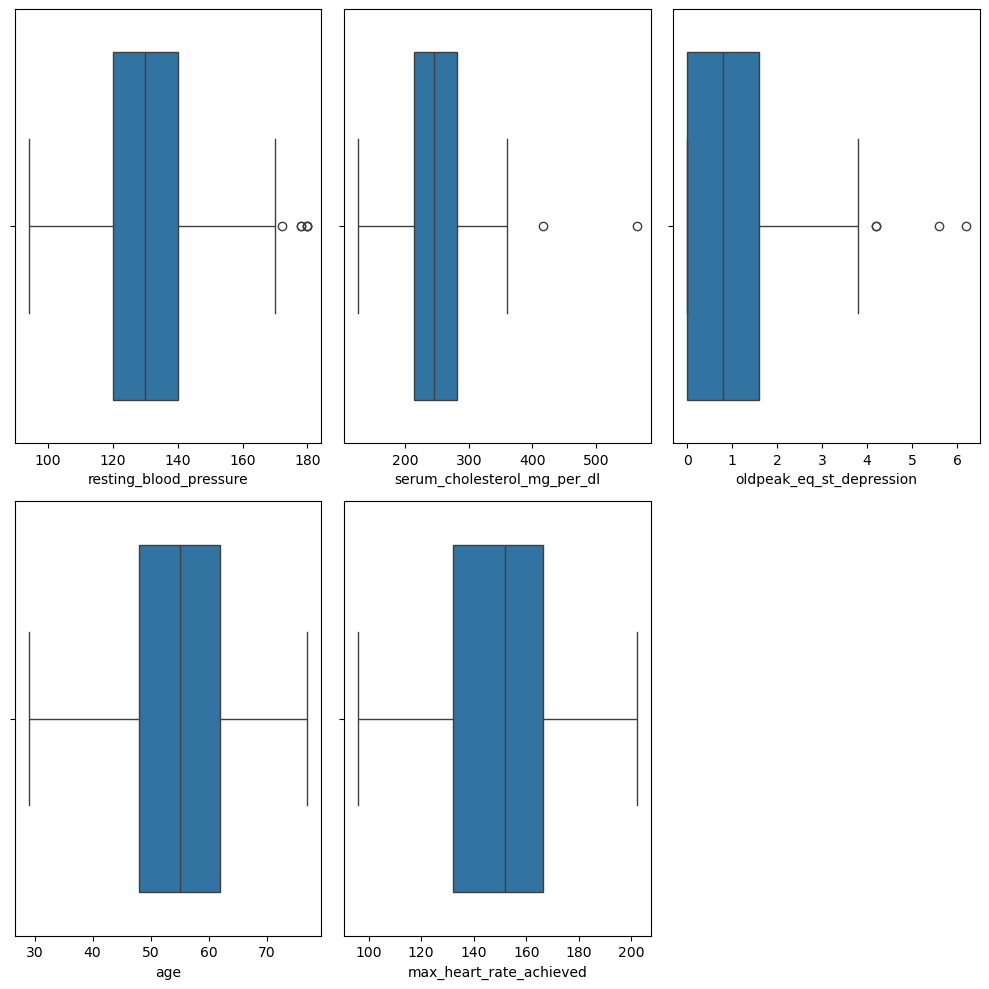

In [26]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in num_cols.drop("patient_id",axis=1):
    plt.subplot(2,3,plotnumber)
    sns.boxplot(x=num_cols[i])
    plotnumber+=1
plt.tight_layout()

# Insights from Boxplots

- **Age** and **Max Heart Rate Achieved**: No outliers present.
- **Resting Blood Pressure**, **Serum Cholesterol**, and **Oldpeak ST Depression**: These columns have some outliers.

These observations suggest that the first two features are consistent, while the others may need further examination due to their outliers.


## resting_blood_pressure

In [27]:
## using IQR to remove the outliers
IQR = stats.iqr(data.resting_blood_pressure, interpolation = 'midpoint') 
print("IQR",IQR)
# MIN AND MAX LIMIT CALCULATION

#first quratile
Q1=data.resting_blood_pressure.quantile(0.25)

#third quantile(Q3)
Q3=data.resting_blood_pressure.quantile(0.75)

#getting limit
lower_limit=Q1-1.5*IQR

upper_limit=Q3+1.5*IQR

print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

print("Total number of outlies less than lower_limit",len(data.loc[data['resting_blood_pressure']<lower_limit]))
print("Total number of outlies greater than upper_limit",len(data.loc[data['resting_blood_pressure']>upper_limit]))


IQR 20.0
lower_limit 90.0
upper_limit 170.0
Total number of outlies less than lower_limit 0
Total number of outlies greater than upper_limit 6


In [28]:
# Replace the outliers by median
data.loc[data['resting_blood_pressure']>upper_limit,'resting_blood_pressure']=np.median(data['resting_blood_pressure'])

<Axes: ylabel='resting_blood_pressure'>

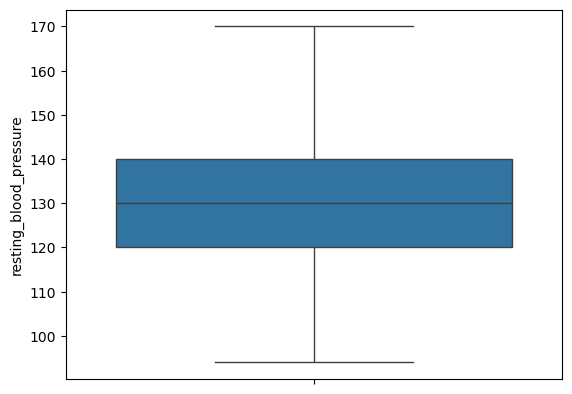

In [29]:
sns.boxplot(data['resting_blood_pressure'])

# serum_cholesterol_mg_per_dl

In [30]:
## using IQR to remove the outliers
IQR = stats.iqr(data.serum_cholesterol_mg_per_dl, interpolation = 'midpoint') 
print("IQR",IQR)
# MIN AND MAX LIMIT CALCULATION

#first quratile
Q1=data.serum_cholesterol_mg_per_dl.quantile(0.25)

#third quantile(Q3)
Q3=data.serum_cholesterol_mg_per_dl.quantile(0.75)


lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

print("Total number of outlies less than lower_limit",len(data.loc[data['serum_cholesterol_mg_per_dl']<lower_limit]))
print("Total number of outlies greater than upper_limit",len(data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit]))

IQR 68.0
lower_limit 111.75
upper_limit 383.25
Total number of outlies less than lower_limit 0
Total number of outlies greater than upper_limit 2


In [31]:
# Replace the outliers by median
data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit,'serum_cholesterol_mg_per_dl']=np.median(data['serum_cholesterol_mg_per_dl'])

<Axes: ylabel='serum_cholesterol_mg_per_dl'>

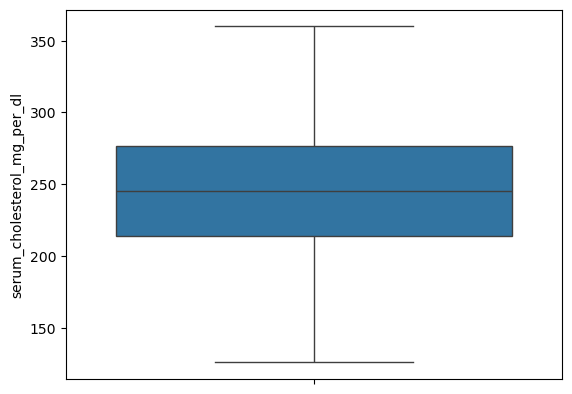

In [32]:
sns.boxplot(data['serum_cholesterol_mg_per_dl'])

# oldpeak_eq_st_depression

In [33]:
## using IQR to remove the outliers
IQR = stats.iqr(data.oldpeak_eq_st_depression, interpolation = 'midpoint') 
print("IQR",IQR)
# MIN AND MAX LIMIT CALCULATION

#first quratile
Q1=data.oldpeak_eq_st_depression.quantile(0.25)

#third quantile(Q3)
Q3=data.oldpeak_eq_st_depression.quantile(0.75)


lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

print("Total number of outlies less than lower_limit",len(data.loc[data['oldpeak_eq_st_depression']<lower_limit]))
print("Total number of outlies greater than upper_limit",len(data.loc[data['oldpeak_eq_st_depression']>upper_limit]))

IQR 1.6
lower_limit -2.4000000000000004
upper_limit 4.0
Total number of outlies less than lower_limit 0
Total number of outlies greater than upper_limit 4


In [34]:
# Replace the outliers by median
data.loc[data['oldpeak_eq_st_depression']>upper_limit,'oldpeak_eq_st_depression']=np.median(data['oldpeak_eq_st_depression'])

<Axes: ylabel='oldpeak_eq_st_depression'>

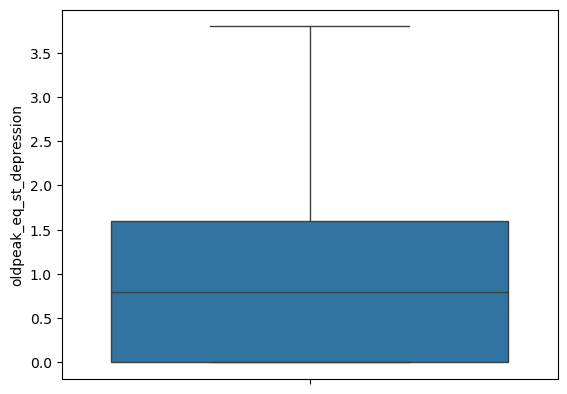

In [35]:
sns.boxplot(data['oldpeak_eq_st_depression'])

## FEATURE SCALING
#### STANDARD SCALING
* Standard scaling is used because of features are mesure in different units as well as some feature are followed normal distribution
* Standard scaling range : -3 to +3

In [36]:
# import liabrary
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

# Scaling the feature 
data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']] = scale.fit_transform(data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']])

# FEATURE SELECTION
### DROP UNWANTED COLUMNS
* Here we are removing 'patient_id' from the dataset as all the values are unique and there is not much noticeable variations in the data.

In [37]:
# removing 'patient_id' from the dataset
data.drop(columns='patient_id',inplace=True)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,2,-0.117432,2,0,0,2,1.358696,-0.985690,1,-1.053964,0.932485,0,0
1,2,2,-1.352755,3,0,0,0,-0.717635,0.736875,0,-0.087134,0.387084,0,0
2,1,2,-0.323319,4,3,0,2,1.270341,-0.985690,1,2.383654,0.568884,1,1
3,1,1,1.529666,4,0,0,0,-0.518837,-0.985690,1,-1.591092,1.432436,0,1
4,3,1,0.019826,1,0,0,2,0.519328,-0.124407,1,0.449994,-0.203768,0,0


### CHECKING CORELATION

In [38]:
data.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,-0.317019,0.061536,0.121207,0.076832,0.050199,0.172191,-0.047307,0.535583,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,-0.317019,1.000000,-0.122475,-0.254939,-0.153024,-0.064897,0.004791,0.074096,-0.279462,-0.412284,-0.067663,0.278681,-0.317990,-0.460933
resting_blood_pressure,0.061536,-0.122475,1.000000,-0.037038,0.090367,0.096842,0.113544,0.163281,0.110505,-0.016618,0.259479,-0.014901,0.056117,0.076048
chest_pain_type,0.121207,-0.254939,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.081077,0.070715,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,-0.153024,0.090367,0.249061,1.000000,0.169792,0.096656,0.135630,0.167406,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,-0.064897,0.096842,-0.088992,0.169792,1.000000,0.053864,0.001109,-0.002458,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,0.004791,0.113544,0.033379,0.096656,0.053864,1.000000,0.141028,0.118666,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.047307,0.074096,0.163281,0.081077,0.135630,0.001109,0.141028,1.000000,-0.006879,-0.087374,0.200082,-0.108363,0.137476,0.146419
oldpeak_eq_st_depression,0.535583,-0.279462,0.110505,0.070715,0.167406,-0.002458,0.118666,-0.006879,1.000000,0.121071,0.202029,-0.324242,0.263756,0.388253
sex,0.093340,-0.412284,-0.016618,0.086057,0.073107,0.066010,0.045786,-0.087374,0.121071,1.000000,-0.148997,-0.053960,0.251096,0.335421


<Axes: >

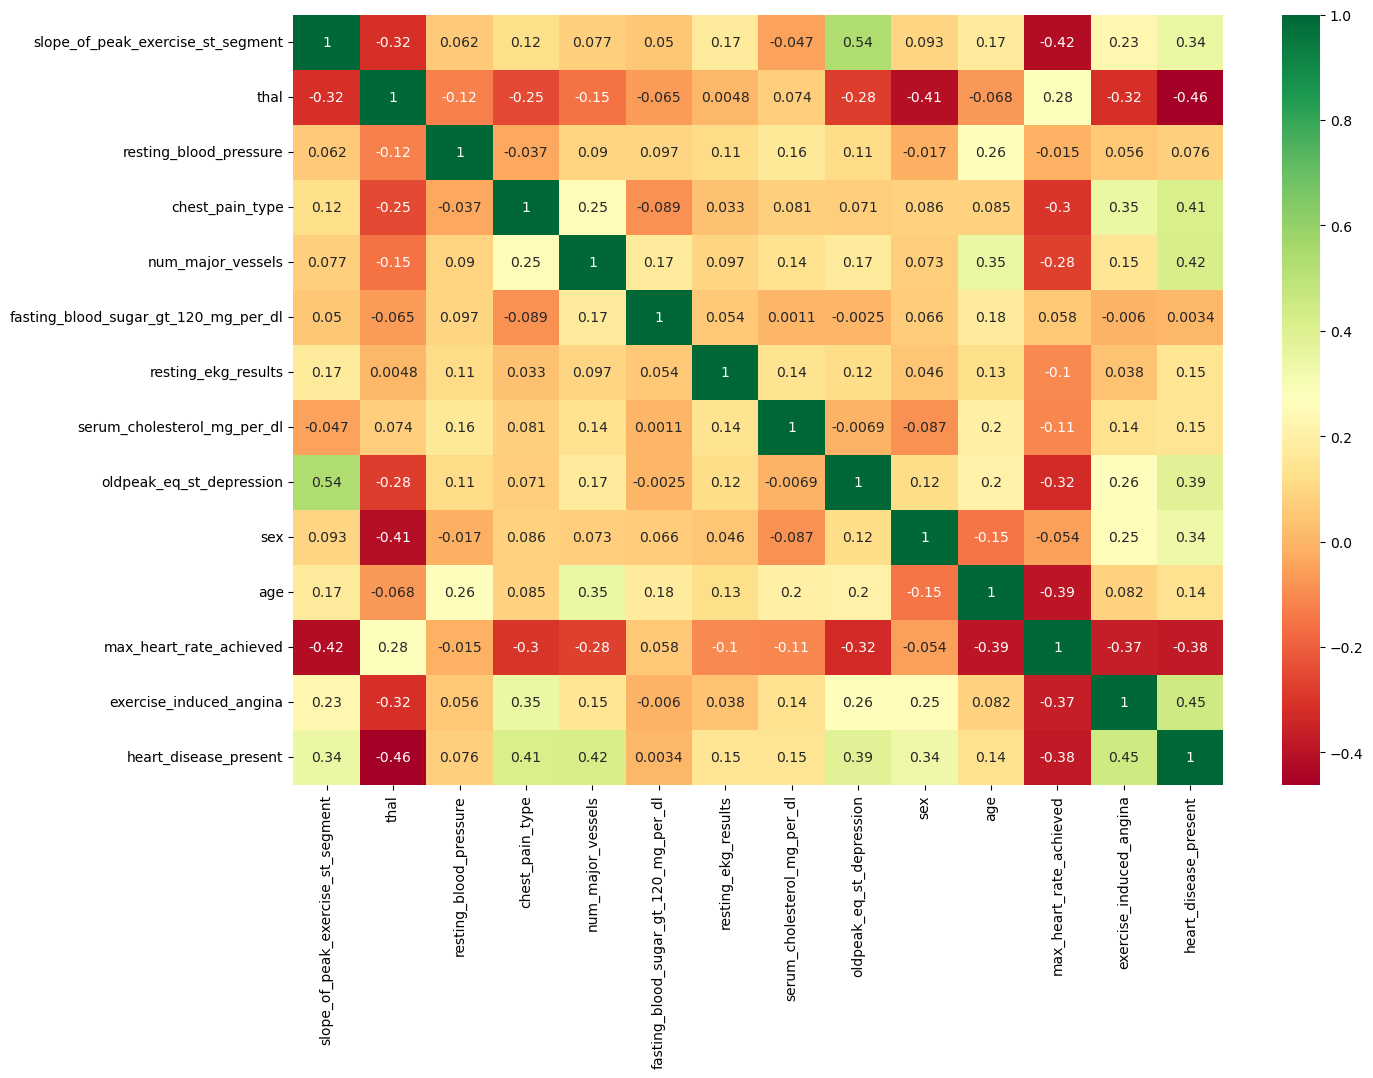

In [39]:
# plot hitmap for better visualisation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':10})

* In dataset no highly correlated feature is available.

### CHECKING DUPLICATES

In [40]:
data.duplicated().sum()

0

* Thereis no duplicate in data

# MODEL CREATION

#### DEFINE INDEPENDANT AND DEPENDANT VERIABLE

In [41]:
X = data.iloc[:,:-1]
y = data['heart_disease_present']

In [42]:
X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,2,-0.117432,2,0,0,2,1.358696,-0.985690,1,-1.053964,0.932485,0
1,2,2,-1.352755,3,0,0,0,-0.717635,0.736875,0,-0.087134,0.387084,0
2,1,2,-0.323319,4,3,0,2,1.270341,-0.985690,1,2.383654,0.568884,1
3,1,1,1.529666,4,0,0,0,-0.518837,-0.985690,1,-1.591092,1.432436,0
4,3,1,0.019826,1,0,0,2,0.519328,-0.124407,1,0.449994,-0.203768,0


In [43]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

#### CHECKING THE BALANCE OF TARGET VERIABLE

In [44]:
y.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

### BALANCING

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [47]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 78, 1: 66})
SMOTE Classes Counter({0: 78, 1: 78})


### MODELS

* 1. **Logistic Regression**
* 2. **K-Nearest Neighbors (KNN)**
* 3. **Support Vector Classifier (SVC)**
* 4. **Random Forest Classifier**
* 5. **Gradient Boosting Classifier**
* 6. **AdaBoost Classifier**
* 7. **XGBoost Classifier**


In [48]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_smote, y_smote)  # Train on SMOTE data
    y_pred = model.predict(X_test)  # Predict on test data
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 60)


Training Logistic Regression...
Logistic Regression Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.79      0.79      0.79        14

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.82        36
weighted avg       0.83      0.83      0.83        36

[[19  3]
 [ 3 11]]
------------------------------------------------------------
Training KNN...
KNN Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.79      0.79      0.79        14

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.82        36
weighted avg       0.83      0.83      0.83        36

[[19  3]
 [ 3 11]]
------------------------------------------------------------
Training SVC...
SVC Accuracy: 0.8611
              precision    recall  f1-score

In [49]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['lbfgs', 'liblinear', 'saga']
    },
    'KNN': {
        'n_neighbors': [1, 3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'SVC': {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 5, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 4, 5, 6, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.5, 1, 2],
        'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in [1, 2, 3]]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}


In [50]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [51]:
# Store results for accuracy and recall scores
results = {}
recall_scores = {}
best_models = {}

# Train and evaluate models with hyperparameter tuning and cross-validation
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_smote, y_smote)
    
    best_model = grid_search.best_estimator_
    best_models[name] = best_model  # Store the best model
    
    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X_smote, y_smote, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[name] = mean_cv_score  # Store CV accuracy
    recall_scores[name] = recall  # Store recall score
    
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"{name} Cross-Validation Accuracy: {mean_cv_score:.4f}")
    print(f"{name} Test Accuracy: {accuracy:.4f}")
    print(f"{name} Test Recall Score: {recall:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 60)


Training Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Cross-Validation Accuracy: 0.8337
Logistic Regression Test Accuracy: 0.8333
Logistic Regression Test Recall Score: 0.7857
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.79      0.79      0.79        14

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.82        36
weighted avg       0.83      0.83      0.83        36

[[19  3]
 [ 3 11]]
------------------------------------------------------------
Training KNN...
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNN Cross-Validation Accuracy: 0.8593
KNN Test Accuracy: 0.8889
KNN Test Recall Score: 0.8571
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.86      0.86     

In [52]:
# Prepare data for plotting
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Mean CV Accuracy': list(results.values()),
    'Recall Score': list(recall_scores.values())
})


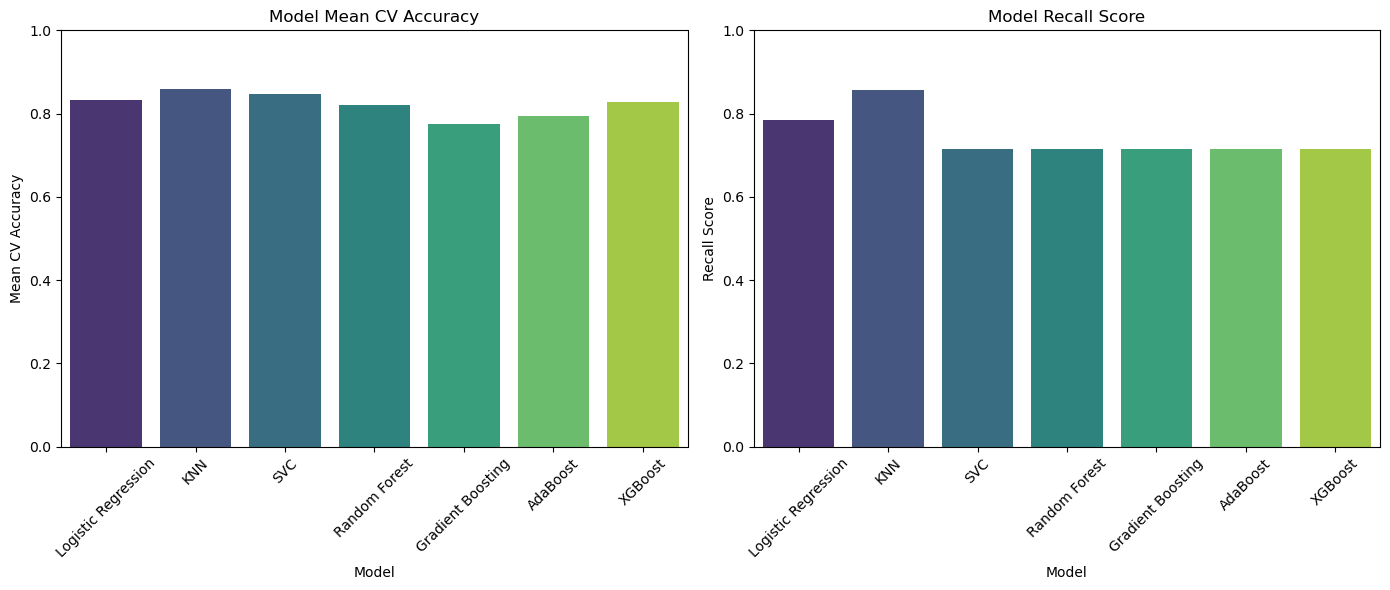

In [53]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot Mean CV Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Mean CV Accuracy', data=results_df, palette='viridis')
plt.title('Model Mean CV Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot Recall Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Recall Score', data=results_df, palette='viridis')
plt.title('Model Recall Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 600x600 with 0 Axes>

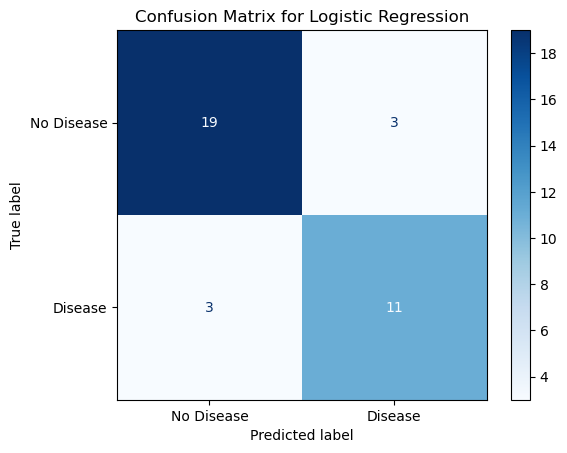

<Figure size 600x600 with 0 Axes>

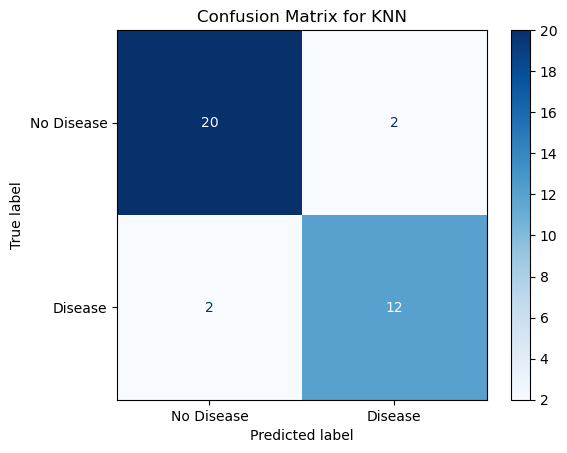

<Figure size 600x600 with 0 Axes>

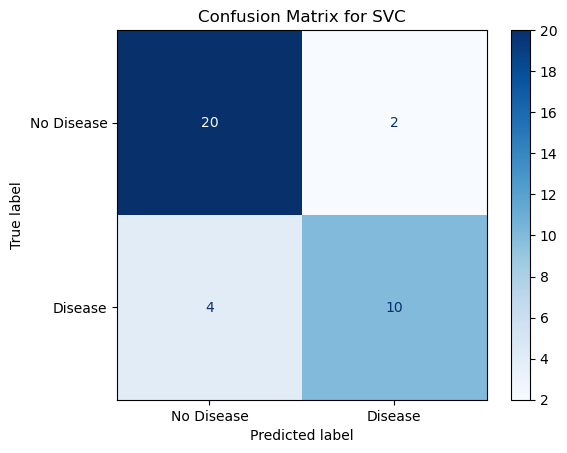

<Figure size 600x600 with 0 Axes>

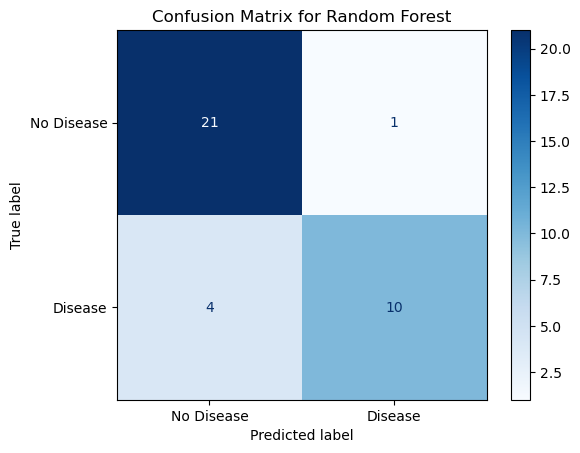

<Figure size 600x600 with 0 Axes>

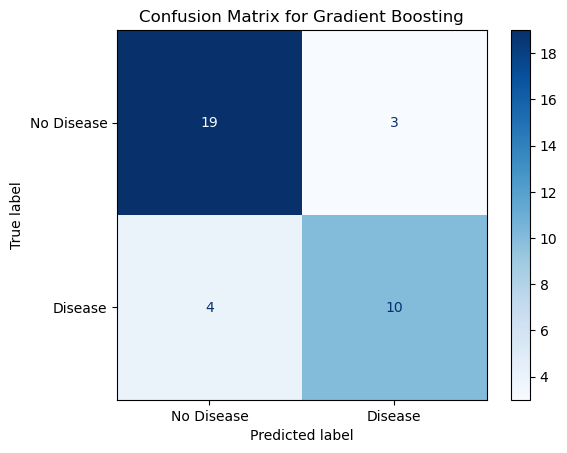

<Figure size 600x600 with 0 Axes>

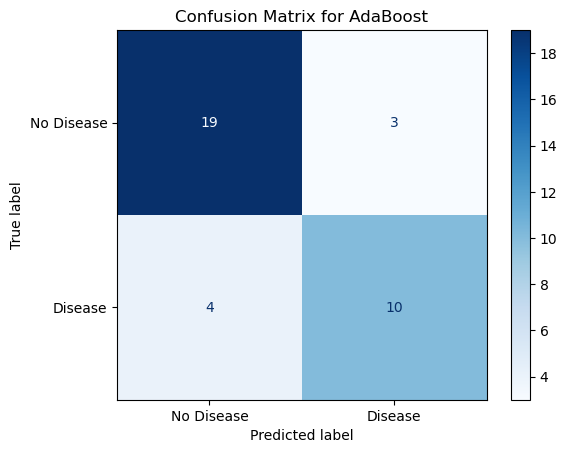

<Figure size 600x600 with 0 Axes>

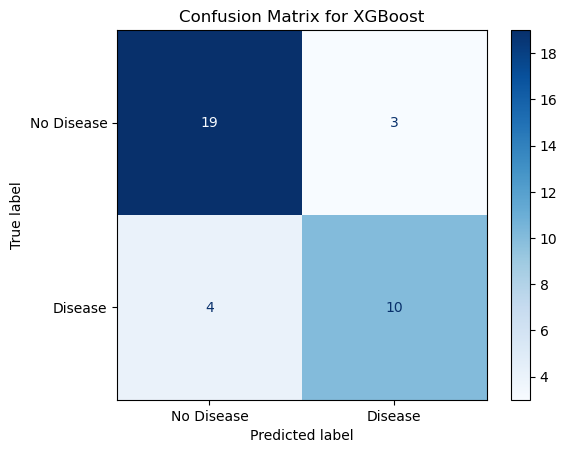

In [54]:
# Plot confusion matrices for each model
for name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)  # Use the best model for predictions
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
    
    plt.figure(figsize=(6, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


Logistic Regression AUC Score: 0.90
KNN AUC Score: 0.95
SVC AUC Score: 0.91
Random Forest AUC Score: 0.92
Gradient Boosting AUC Score: 0.91
AdaBoost AUC Score: 0.92
XGBoost AUC Score: 0.90


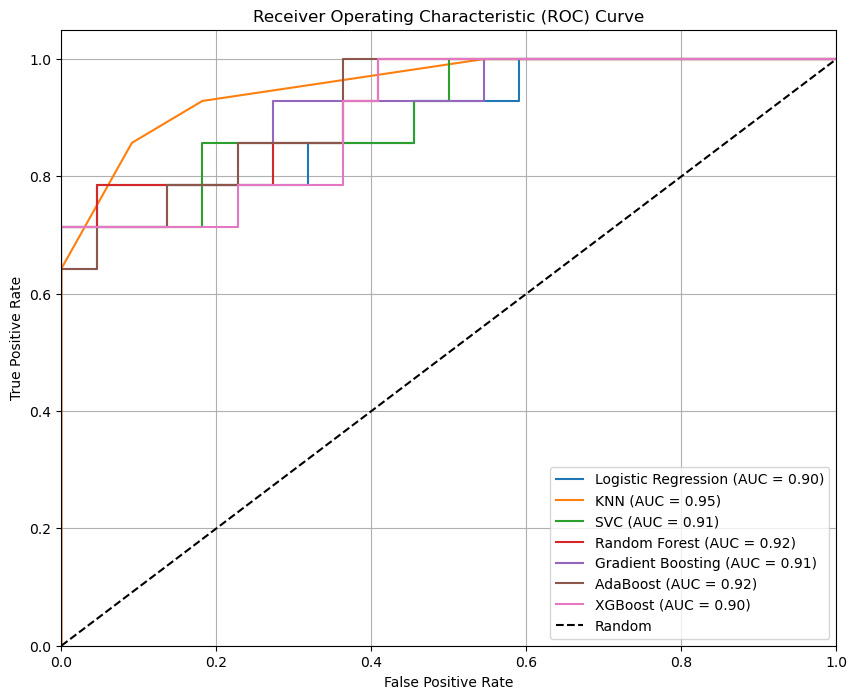

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create figure
plt.figure(figsize=(10, 8))

# Loop through each best model
for name, model in best_models.items():
    # Calculate predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Print AUC score
    print(f'{name} AUC Score: {roc_auc:.2f}')
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random predictions
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Heart Disease Prediction Model Comparison Report

## Introduction
The goal of this project was to develop a robust predictive model for heart disease using various machine learning algorithms on a dataset containing 180 entries and 15 columns. Multiple models were evaluated, including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Random Forest, Gradient Boosting, AdaBoost, and XGBoost. This report summarizes their performance and suggests the most suitable model for implementation.

## Model Performance Summary

| **Model**               | **Cross-Validation Accuracy** | **Test Accuracy** | **Recall (1)** | **F1-Score (1)** | **AUC Score** |
|-------------------------|-------------------------------|-------------------|-----------------|-------------------|----------------|
| **Logistic Regression** | 0.8337                        | 0.8333            | 0.7857          | 0.79              | 0.90           |
| **KNN**                 | 0.8593                        | 0.8889            | 0.8571          | 0.86              | 0.95           |
| **SVC**                 | 0.8466                        | 0.8333            | 0.7143          | 0.77              | 0.91           |
| **Random Forest**       | 0.8208                        | 0.8611            | 0.7143          | 0.80              | 0.92           |
| **Gradient Boosting**   | 0.7756                        | 0.8056            | 0.7143          | 0.74              | 0.88           |
| **AdaBoost**            | 0.7948                        | 0.8056            | 0.7143          | 0.74              | 0.78           |
| **XGBoost**             | 0.8270                        | 0.8056            | 0.7143          | 0.74              | 0.90           |

## Best Model for Implementation
Based on the evaluation metrics, **KNN** showed the highest test accuracy of **88.89%** and a recall of **85.71%**. It also outperformed in F1-score (**0.86**). Therefore, KNN is recommended for implementation due to its balanced performance, ensuring effective identification of patients at risk for heart disease.

## Challenges Faced

1. **Small Dataset Size:**
   - **Challenge:** The dataset only contains 180 entries, which can lead to overfitting and unreliable model performance.
   - **Technique Used:** Cross-validation was employed to maximize the use of available data for training and validation, ensuring a more reliable assessment of model performance.

2. **Imbalanced Dataset:**
   - **Challenge:** The dataset was imbalanced, with significantly fewer cases of heart disease compared to non-cases, potentially biasing the models.
   - **Technique Used:** Stratified sampling was used to maintain the distribution of classes across training and validation sets. Class weights were adjusted during model training to give more importance to the minority class.

3. **Feature Selection:**
   - **Challenge:** The dataset included 15 columns, making it challenging to identify which features were most relevant for predicting heart disease.
   - **Technique Used:** Feature importance scores from Random Forest models were analyzed to select impactful features, allowing for dimensionality reduction and improved model interpretability.

4. **Overfitting:**
   - **Challenge:** Complex models risked overfitting the limited training data.
   - **Technique Used:** Cross-validation techniques were utilized for more reliable performance evaluation, and hyperparameter tuning was performed to optimize model settings and reduce the likelihood of overfitting.

5. **Evaluation Metrics:**
   - **Challenge:** Selecting the appropriate evaluation metrics was crucial for this health application.
   - **Reason for Emphasizing Recall:** High recall is critical in medical diagnostics to minimize false negatives, ensuring individuals at risk for heart disease are correctly identified and can receive necessary treatment.

## Conclusion
KNN is the recommended model for heart disease prediction due to its robust performance metrics. It effectively balances accuracy, recall, and F1-score, making it suitable for clinical applications. Continuous evaluation and model updates are essential to adapt to changing patient data and ensure sustained effectiveness.


# Suggestions for Hospitals to Improve Heart Disease Predictions

1. **Implement Predictive Analytics Tools**
   - Use advanced machine learning algorithms to analyze patient data and identify risk factors for heart disease.
   - Regularly update models with new patient data to enhance accuracy.

2. **Integrate Health Data Sources**
   - Combine electronic health records (EHRs), lab results, and data from wearable devices to create a comprehensive view of patient health.
   - Ensure interoperability between systems for seamless data sharing.

3. **Enhance Screening Programs**
   - Conduct regular risk assessments for high-risk populations, such as those with a family history of heart disease.
   - Develop personalized health plans based on individual risk factors identified through predictive models.

4. **Increase Staff Training**
   - Train healthcare professionals on interpreting predictive analytics and incorporating findings into clinical practice.
   - Foster a culture of awareness around heart disease risk and prevention strategies.

5. **Patient Education Initiatives**
   - Educate patients about their risk factors and the importance of early detection and regular check-ups.
   - Provide tools and resources for patients to monitor their health metrics actively.

6. **Develop Decision Support Systems**
   - Implement clinical decision support systems (CDSS) to assist providers in making informed decisions based on predictive analytics.
   - Set up alerts for healthcare providers for patients at increased risk.

7. **Utilize Telehealth Services**
   - Offer telehealth consultations to monitor high-risk patients remotely and provide timely interventions.
   - Implement remote monitoring solutions to track vital signs and health changes in real-time.

8. **Community Outreach and Collaboration**
   - Partner with local organizations to promote heart health initiatives and screenings, especially in underserved communities.
   - Establish support groups for patients with heart disease to foster healthy lifestyle changes.

9. **Continuous Research and Improvement**
   - Invest in research to identify new risk factors and improve predictive models.
   - Create feedback loops to refine strategies based on patient outcomes.

## Conclusion
By adopting these strategies, hospitals can enhance their predictive capabilities for heart disease, leading to timely interventions and improved patient outcomes, ultimately preventing life-threatening situations.
